In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import *
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn import svm
from datetime import datetime
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(10.0,10)})
%matplotlib inline

In [2]:
df=pd.read_csv("train.csv")

Первый этап, подготовка данных. Распарсить var0, посчитать время в секундах для каждого пользователя.

In [3]:
df

,id,result,enter,leave,var0,var1,var2,var3
0,0,0,2018-11-02 20:43:36,2018-11-02 20:44:11,22480,1277,75137,"[3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
1,0,0,2018-11-02 20:44:15,2018-11-02 20:45:08,22480,1277,74096,"[1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
2,0,0,2018-11-06 06:58:06,2018-11-06 06:58:10,25795,461,2618,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
3,0,0,2018-11-06 08:38:29,2018-11-06 08:38:36,20078,3715,32151,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
4,0,0,2018-11-06 08:38:39,2018-11-06 08:39:05,20078,3715,33750,"[0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0..."
5,0,0,2018-11-12 18:00:06,2018-11-12 18:00:36,28600,2644,32150,"[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
6,0,0,2018-11-12 18:00:06,2018-11-12 18:00:37,28600,2644,32150,"[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
7,0,0,2018-11-12 21:50:59,2018-11-12 21:51:04,29203,5170,32150,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
8,0,0,2018-11-12 21:51:06,2018-11-12 21:51:23,29203,5170,33750,"[0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0..."
9,0,0,2018-11-12 21:51:24,2018-11-12 21:51:58,29203,5170,34552,"[1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0..."


Посчитаем время в секундах для каждого экземпляра, и добавим это значение к исходному набору данных

In [4]:
sec=[]
for number in  range(df.shape[0]):
    x=datetime.strptime( df.leave[number], "%Y-%m-%d %H:%M:%S" )-datetime.strptime( df.enter[number], "%Y-%m-%d %H:%M:%S" )
    #print (x.seconds)
    sec.append (x.seconds)


In [5]:
df['timeS'] = sec

В переменной var3 находится вектор дополнительный признаков в формате строки. Распарсим эти значение в отдельный дата фрейм, и объединим его с исходным

In [6]:
new=[]
for number in  range(df.shape[0]):
    x=np.fromstring(df.var3[number][1:-1], dtype=int, sep=',')
    new.append (x)

In [7]:
df2=pd.DataFrame(new)
df2.columns=['d1', 'd2', 'd3','d4', 'd5','d6', 'd7', 'd8','d9', 'd10','d11', 'd12', 'd13','d14', 'd15','d16', 'd17', 'd18','d19', 'd20','d21', 'd22', 'd23','d24','d25']

In [8]:
 df3 = pd.concat([df, df2], axis=1)

Рассмотрим каждую строку как отдельного пользователя, для этого удалим айди и другие признаки

In [9]:
df3=df3.drop('var3',axis=1)
df3=df3.drop('enter',axis=1)
df3=df3.drop('leave',axis=1)
df3=df3.drop('id',axis=1)

In [10]:
df3.head()

,result,var0,var1,var2,timeS,d1,d2,d3,d4,d5,...,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25
0,0,22480,1277,75137,35,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,22480,1277,74096,53,1,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,25795,461,2618,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,20078,3715,32151,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,20078,3715,33750,26,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


рассмотрим описательные статистики набора данных

In [11]:
df3.describe()

,result,var0,var1,var2,timeS,d1,d2,d3,d4,d5,...,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25
count,253425.000000,253425.000000,253425.000000,253425.000000,253425.000000,253425.000000,253425.000000,253425.000000,253425.000000,253425.000000,...,253425.000000,253425.000000,253425.000000,253425.000000,253425.000000,253425.000000,253425.000000,253425.000000,253425.000000,253425.000000
mean,0.101979,19964.470439,6824.415626,47757.531143,683.660239,0.487347,0.230778,0.256778,0.257891,0.244293,...,0.136439,0.124238,0.108955,0.103995,0.101880,0.094272,0.081965,0.069255,0.068916,0.056754
std,0.302621,11335.989594,2106.641540,25714.479620,4879.636323,1.255375,0.832692,0.882228,0.895979,0.861443,...,0.584863,0.571293,0.536051,0.528574,0.520018,0.508385,0.491834,0.464953,0.451694,0.416427
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11225.000000,6257.000000,27855.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,20246.000000,7760.000000,48118.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,29603.000000,8115.000000,69516.000000,82.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,40045.000000,8811.000000,90890.000000,86399.000000,75.000000,37.000000,36.000000,45.000000,60.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000


Классы несбалансированы, отличаются практически в 10 раз

In [12]:
df3["result"].value_counts()

0    227581
1     25844
Name: result, dtype: int64

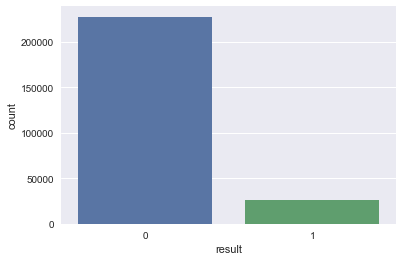

In [13]:
sns.countplot(x="result", data=df3)

Для классификации, я решил использовать градиентный бустинг и случайный лес, без предварительной настройки параметров,оставил либо по умолчанию, либо немного изменил.

Учитывая дисбаланс классов, для проверки обобщающей способности алгорима,
воспользуюсь стратифицированной  10 кратной кросс-валидацией.
Функции для случайного леса и градиентного бустинга описаны ниже.

In [27]:
def GBM_strat(X,y):
    kf = StratifiedKFold(n_splits=10,shuffle=True)
    cv_score =[]
    i=1
    for train_index,test_index in kf.split(X,y):
        print('{} of KFold {}'.format(i,kf.n_splits))
        xtr,xvl = X.loc[train_index],X.loc[test_index]
        ytr,yvl = y.loc[train_index],y.loc[test_index]
        GBM = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, subsample= 0.8, max_features=0.8, max_depth=3)
        GBM.fit(xtr,ytr)
        score = roc_auc_score(yvl, GBM.predict_proba(xvl)[:,1])
        print('ROC AUC score:',score)
        cv_score.append(score) 
        i=i+1
    return (cv_score, GBM, GBM.predict_proba(xvl)[:,1], yvl)

In [35]:
def RF_strat(X,y):
    kf = StratifiedKFold(n_splits=10,shuffle=True)
    cv_score_RF =[]
    i=1
    for train_index,test_index in kf.split(X,y):
        print('{} of KFold {}'.format(i,kf.n_splits))
        xtr,xvl = X.loc[train_index],X.loc[test_index]
        ytr,yvl = y.loc[train_index],y.loc[test_index]
        RF = RandomForestClassifier(n_estimators=500, max_features=0.8, n_jobs =-1)
        RF.fit(xtr,ytr)
        score = roc_auc_score(yvl, RF.predict_proba(xvl)[:,1])
        print('ROC AUC score:',score)
        cv_score_RF.append(score)
        i=i+1
    return (cv_score_RF, RF, RF.predict_proba(xvl)[:,1], yvl)

Функция для отрисовки наиболее информативных признаков, по мнению ансамблевыех алгоритмов

In [16]:
def feaure_importance_graph(obj, X):   
    sns.barplot(x=obj.feature_importances_, y=list(X))

Функция для отрисовки ROC кривой

In [31]:
def Roc_grahp(yvl, score):   
    frp,trp, threshold = roc_curve(yvl,score)
    roc_auc_ = auc(frp,trp)
    plt.figure(figsize=(14,8))
    plt.title('Reciever Operating Characteristics')
    plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')


Проведём классификацию с участием всех признаков из набора данных.

Разделю вектор меток, и остальные признаки на соотвественно X и y

In [18]:
X = df3.drop('result',axis=1)
y = df3['result']

Градиентный бустинг

In [28]:
all_score, obj, last_score, yvl = GBM_strat(X,y)

1 of KFold 10
ROC AUC score: 0.885647423430933
2 of KFold 10
ROC AUC score: 0.8795351578283183
3 of KFold 10
ROC AUC score: 0.8761253253686123
4 of KFold 10
ROC AUC score: 0.8787584377411102
5 of KFold 10
ROC AUC score: 0.8815408904622252
6 of KFold 10
ROC AUC score: 0.878305806864908
7 of KFold 10
ROC AUC score: 0.8892653200983724
8 of KFold 10
ROC AUC score: 0.8891086797089962
9 of KFold 10
ROC AUC score: 0.8860493244712097
10 of KFold 10
ROC AUC score: 0.8895953506772157


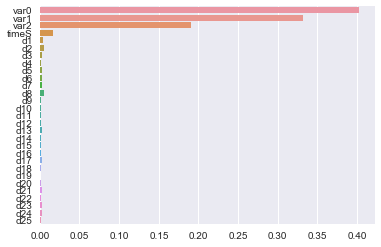

In [29]:
feaure_importance_graph(obj, X)

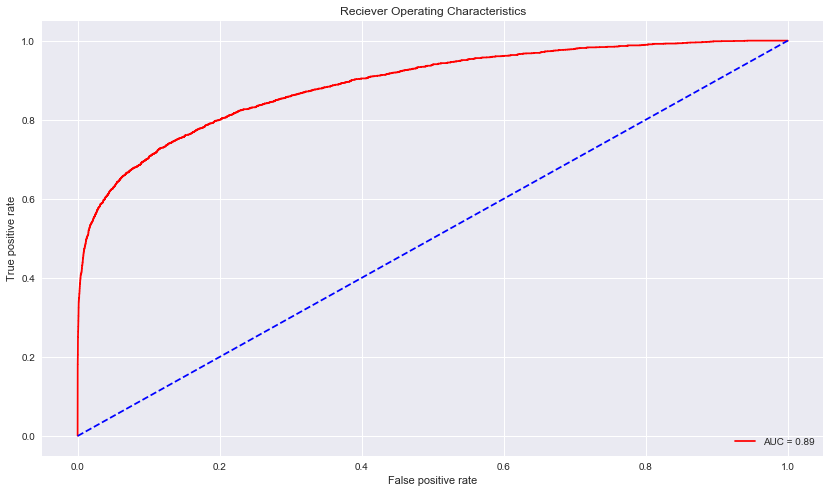

In [32]:
Roc_grahp(yvl, last_score)

Случайный лес

In [36]:
all_score1, obj1, last_score1, yvl1 = RF_strat(X,y)

1 of KFold 10
ROC AUC score: 0.9928923648119142
2 of KFold 10
ROC AUC score: 0.9915700526080229
3 of KFold 10
ROC AUC score: 0.9910576475073785
4 of KFold 10
ROC AUC score: 0.9931465339711774
5 of KFold 10
ROC AUC score: 0.9935518371112719
6 of KFold 10
ROC AUC score: 0.9914158039754402
7 of KFold 10
ROC AUC score: 0.992822846700116
8 of KFold 10
ROC AUC score: 0.9920728127583891
9 of KFold 10
ROC AUC score: 0.9932825309345852
10 of KFold 10
ROC AUC score: 0.9935627457374224


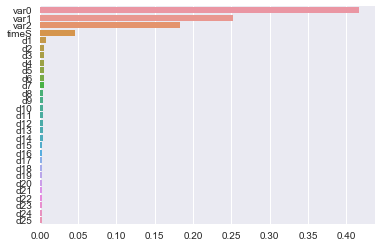

In [38]:
feaure_importance_graph(obj1, X)

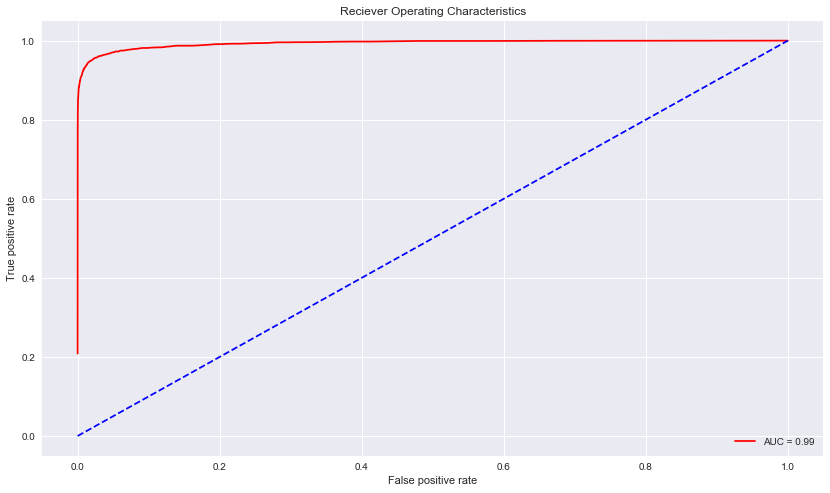

In [39]:
Roc_grahp(yvl1, last_score1)

Random forest показывает результат 0.99 , выглядит подозрительно...

По результатам работы, видно что классификаторы показывают хорошую обобщающую способность, при этом ориентируясь на категориальные переменные var0 var1 var2. Поробуем исключить категорильные признаки оставить только действия на сайте.

In [41]:
df4=df3
df4=df4.drop('var0',axis=1)
df4=df4.drop('var1',axis=1)
df4=df4.drop('var2',axis=1)
df4=df4.drop('timeS',axis=1)

In [42]:
df4.head()

,result,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25
0,0,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
X2 = df4.drop('result',axis=1)
y2 = df4['result']

Проведу такой же эксперимент как и со всеми признакми.

In [44]:
all_score2, obj2, last_score2, yvl2 = GBM_strat(X2,y2)

1 of KFold 10
ROC AUC score: 0.5543960121032742
2 of KFold 10
ROC AUC score: 0.5579240696365748
3 of KFold 10
ROC AUC score: 0.5613897924899154
4 of KFold 10
ROC AUC score: 0.5511928553446803
5 of KFold 10
ROC AUC score: 0.5484084527007411
6 of KFold 10
ROC AUC score: 0.5516046546555126
7 of KFold 10
ROC AUC score: 0.5603713469791319
8 of KFold 10
ROC AUC score: 0.5582939806558005
9 of KFold 10
ROC AUC score: 0.5542923088727074
10 of KFold 10
ROC AUC score: 0.5562991899966725


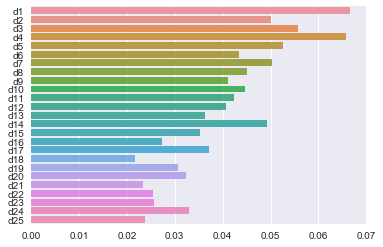

In [45]:
feaure_importance_graph(obj2, X2)

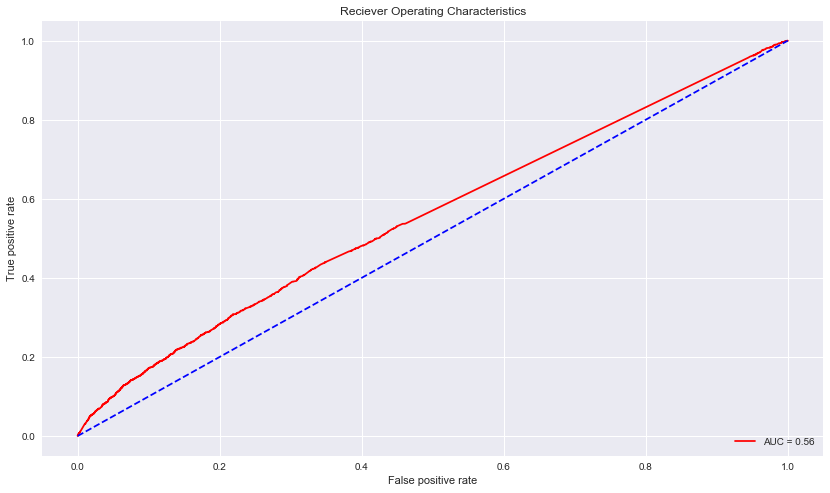

In [46]:
Roc_grahp(yvl2, last_score2)

In [47]:
all_score3, obj3, last_score3, yvl3 = RF_strat(X2,y2)

1 of KFold 10
ROC AUC score: 0.5880759990967503
2 of KFold 10
ROC AUC score: 0.5949915458980309
3 of KFold 10
ROC AUC score: 0.5743293875191379
4 of KFold 10
ROC AUC score: 0.5814143448270704
5 of KFold 10
ROC AUC score: 0.575603827742539
6 of KFold 10
ROC AUC score: 0.5962084285266134
7 of KFold 10
ROC AUC score: 0.5957472223559939
8 of KFold 10
ROC AUC score: 0.5849165465442425
9 of KFold 10
ROC AUC score: 0.5818168132350694
10 of KFold 10
ROC AUC score: 0.5877507317537031


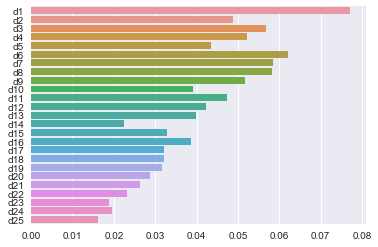

In [49]:
feaure_importance_graph(obj3, X2)

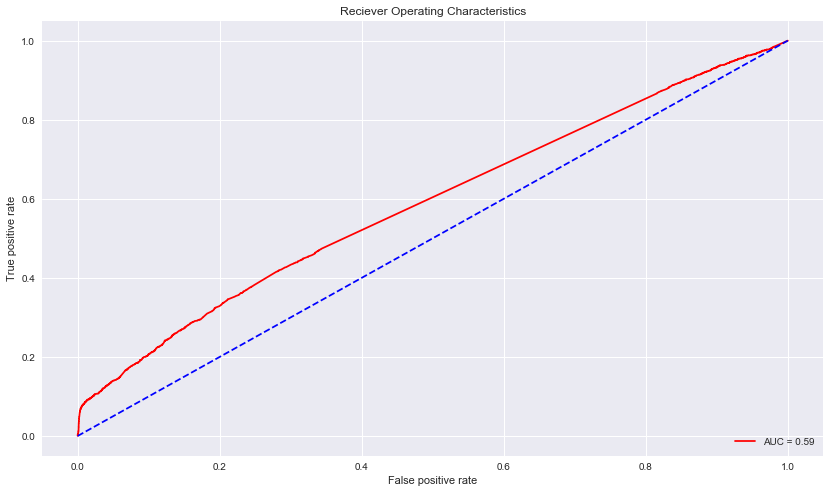

In [50]:
Roc_grahp(yvl3, last_score3)

Видно, что классификаторы становятся рандомными, и не могут обобщить данные.

Итого максимальный вклад в результат классификации достигается за счёт категориальных переменных.

Лучшим оказался случайный лес

Возникла идея объединить строки таким образом чтобы одна строка означала одного пользователя


НО сразу возникает куча вопросов, ведь признаки категориальные, и нельзя брать сумму или среднее,
ведь это уничтожит полезную информацию хранящиюся в категорииях.

Исключим из данных даты захода и строковый вектор

In [58]:
df5=pd.concat([df, df2], axis=1)
df5=df5.drop('var3',axis=1)
df5=df5.drop('enter',axis=1)
df5=df5.drop('leave',axis=1)

In [60]:
df5.head()

,id,result,var0,var1,var2,timeS,d1,d2,d3,d4,...,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25
0,0,0,22480,1277,75137,35,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,22480,1277,74096,53,1,2,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,25795,461,2618,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,20078,3715,32151,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,20078,3715,33750,26,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Разделим набор данных на 2 части, от категорий возьмём моды по каждому пользователю,
по переменным которые означают действия на сайте возьмём суммы или средние значения

In [61]:
new=df5[['id', 'var0', 'var1', 'var2', 'result']]
new=new.groupby('id').agg(lambda x: x.mode()[0])



In [62]:
new.head()

,var0,var1,var2,result
id,,,,
0,16740,881,92,0
1,21382,5988,64012,0
2,23177,4950,15754,0
3,21320,7760,23111,0
4,31535,7760,21734,0


In [63]:
new2=df5
new2=new2.drop('var0',axis=1)
new2=new2.drop('var1',axis=1)
new2=new2.drop('var2',axis=1)
new2=new2.drop('timeS',axis=1)
new2=new2.drop('result',axis=1)

In [64]:
new2=new2.groupby('id').agg(lambda x: x.sum())



In [65]:
new2.head()

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,...,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25
id,,,,,,,,,,,,,,,,,,,,,
0,716,579,632,471,368,302,312,220,239,159,...,153,171,114,87,105,105,169,44,13,13
1,207,14,23,12,15,21,24,23,26,30,...,5,4,24,10,36,26,50,24,14,11
2,1,0,0,2,3,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
3,1140,459,501,483,402,415,378,344,274,313,...,271,184,215,199,164,187,156,132,160,117
4,1218,443,401,450,378,355,340,317,242,226,...,237,211,206,172,168,196,156,145,167,111


In [66]:
df6=pd.concat([new, new2], axis=1)

Итого получим новый набор данных

In [67]:
df6.head()

,var0,var1,var2,result,d1,d2,d3,d4,d5,d6,...,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25
id,,,,,,,,,,,,,,,,,,,,,
0,16740,881,92,0,716,579,632,471,368,302,...,153,171,114,87,105,105,169,44,13,13
1,21382,5988,64012,0,207,14,23,12,15,21,...,5,4,24,10,36,26,50,24,14,11
2,23177,4950,15754,0,1,0,0,2,3,0,...,1,1,0,0,0,1,0,0,0,0
3,21320,7760,23111,0,1140,459,501,483,402,415,...,271,184,215,199,164,187,156,132,160,117
4,31535,7760,21734,0,1218,443,401,450,378,355,...,237,211,206,172,168,196,156,145,167,111


In [68]:
X3 = df6.drop('result',axis=1)
y3 = df6['result']

Проведём такой же эксперемнт как и на предыдущих шагах

In [69]:
all_score4, obj4, last_score4, yvl4 = GBM_strat(X3,y3)

1 of KFold 10
ROC AUC score: 0.5846142185842049
2 of KFold 10
ROC AUC score: 0.6024668607847529
3 of KFold 10
ROC AUC score: 0.585558734295779
4 of KFold 10
ROC AUC score: 0.5798395471482967
5 of KFold 10
ROC AUC score: 0.6015352975911711
6 of KFold 10
ROC AUC score: 0.5620736698499318
7 of KFold 10
ROC AUC score: 0.5798395471482967
8 of KFold 10
ROC AUC score: 0.6151854981572357
9 of KFold 10
ROC AUC score: 0.5521369957850584
10 of KFold 10
ROC AUC score: 0.6085935510162499


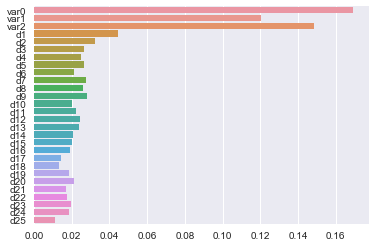

In [70]:
feaure_importance_graph(obj4, X3)

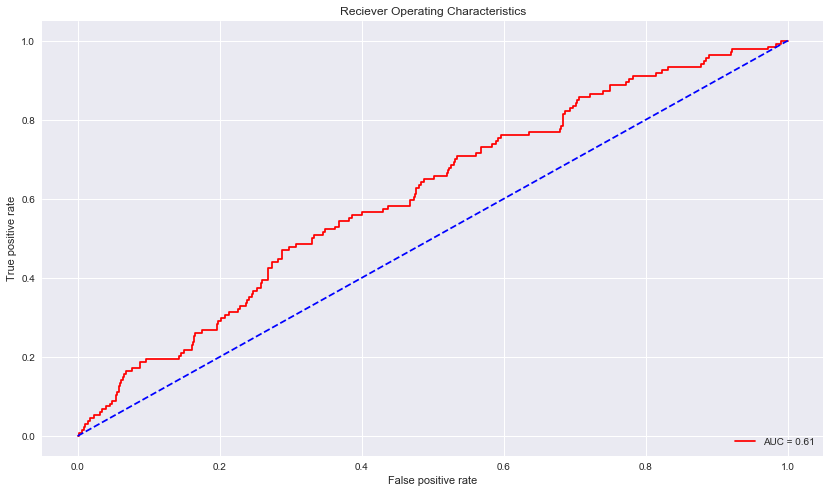

In [71]:
Roc_grahp(yvl4, last_score4)

In [72]:
all_score5, obj5, last_score5, yvl5 = RF_strat(X3,y3)

1 of KFold 10
ROC AUC score: 0.5936461017634278
2 of KFold 10
ROC AUC score: 0.6245214921300727
3 of KFold 10
ROC AUC score: 0.578462564394942
4 of KFold 10
ROC AUC score: 0.5811096292073058
5 of KFold 10
ROC AUC score: 0.5881243509600701
6 of KFold 10
ROC AUC score: 0.5924920079004703
7 of KFold 10
ROC AUC score: 0.5578816354788133
8 of KFold 10
ROC AUC score: 0.6076057298772168
9 of KFold 10
ROC AUC score: 0.5918658752621612
10 of KFold 10
ROC AUC score: 0.580372879629158


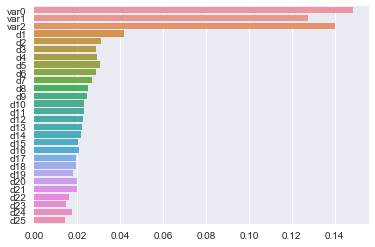

In [74]:
feaure_importance_graph(obj5, X3)

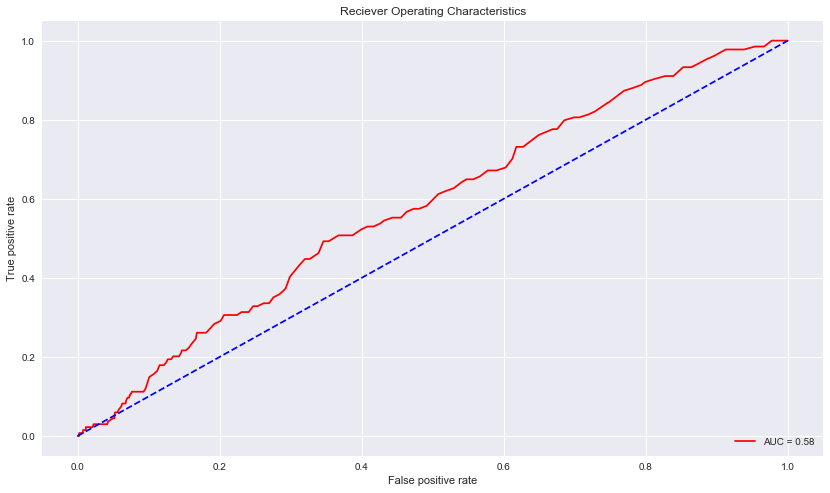

In [75]:
Roc_grahp(yvl5, last_score5)

Я пробовал различные вариации, моды, средние, суммы, однако результаты были плохие. 
Как то иначе суммировать строки с одинаковым айди я не придумал.

Ещё одна идея использовать категориальный временной ряд.
я хотел представить все данные в виде ряда с плавающей длиной и частотой дискретизации,

временная шкала это дни, например он заходил 1 фераля 13-го и 1 марта
это 3 точки, а все остальные данные это каналы разные,
3 категориальные переменные, отдельный канал с временем посещения
и ещё 25 каналов это действия на сайте.

И потом всё это в рекуррентную сеть либо так же алгоритмами бустинга, 
но недостаток времени и вычислительных ресурсов и знаний не позволили мне проверить эту теорию.


Получим тестовый вектор

In [76]:
test=pd.read_csv("test.csv")

In [77]:
test.head()

,id,enter,leave,var0,var1,var2,var3
0,16000,2018-12-05 17:27:56,2018-12-05 17:34:11,29990,6319,38538,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
1,16001,2019-02-07 11:44:02,2019-02-07 11:45:04,28006,7794,21789,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
2,16001,2019-02-07 11:44:05,2019-02-07 11:45:03,28006,7794,21789,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
3,16002,2019-01-24 19:50:02,2019-01-24 19:50:38,17596,3198,37207,"[1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1..."
4,16002,2019-01-24 19:50:02,2019-01-24 19:50:38,17596,3199,37207,"[1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1..."


In [78]:
sec2=[]
for number in  range(test.shape[0]):
    x=datetime.strptime( test.leave[number], "%Y-%m-%d %H:%M:%S" )-datetime.strptime( test.enter[number], "%Y-%m-%d %H:%M:%S" )
    #print (x.seconds)
    sec2.append (x.seconds)


In [81]:
test['timeS'] = sec2

In [82]:
test.head()

,id,enter,leave,var0,var1,var2,var3,timeS
0,16000,2018-12-05 17:27:56,2018-12-05 17:34:11,29990,6319,38538,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",375
1,16001,2019-02-07 11:44:02,2019-02-07 11:45:04,28006,7794,21789,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",62
2,16001,2019-02-07 11:44:05,2019-02-07 11:45:03,28006,7794,21789,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",58
3,16002,2019-01-24 19:50:02,2019-01-24 19:50:38,17596,3198,37207,"[1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1...",36
4,16002,2019-01-24 19:50:02,2019-01-24 19:50:38,17596,3199,37207,"[1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1...",36


In [83]:
new=[]
for number in  range(test.shape[0]):
    x=np.fromstring(test.var3[number][1:-1], dtype=int, sep=',')
    new.append (x)

In [84]:
test1=pd.DataFrame(new)
test1.columns=['d1', 'd2', 'd3','d4', 'd5','d6', 'd7', 'd8','d9', 'd10','d11', 'd12', 'd13','d14', 'd15','d16', 'd17', 'd18','d19', 'd20','d21', 'd22', 'd23','d24','d25']

In [85]:
test1.head()

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,...,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [86]:
test1 = pd.concat([test1, test], axis=1)

In [87]:
test1.head()

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,...,d24,d25,id,enter,leave,var0,var1,var2,var3,timeS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,16000,2018-12-05 17:27:56,2018-12-05 17:34:11,29990,6319,38538,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",375
1,0,0,0,0,0,0,0,0,0,0,...,0,0,16001,2019-02-07 11:44:02,2019-02-07 11:45:04,28006,7794,21789,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",62
2,0,0,0,0,0,0,0,0,0,0,...,0,0,16001,2019-02-07 11:44:05,2019-02-07 11:45:03,28006,7794,21789,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",58
3,1,0,0,0,1,0,0,0,0,0,...,0,0,16002,2019-01-24 19:50:02,2019-01-24 19:50:38,17596,3198,37207,"[1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1...",36
4,1,0,0,0,1,0,0,0,0,0,...,0,0,16002,2019-01-24 19:50:02,2019-01-24 19:50:38,17596,3199,37207,"[1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1...",36


In [88]:
test1=test1.drop('var3',axis=1)
test1=test1.drop('enter',axis=1)
test1=test1.drop('leave',axis=1)
test1=test1.drop('id',axis=1)

In [89]:
test1.head()

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,...,d20,d21,d22,d23,d24,d25,var0,var1,var2,timeS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,29990,6319,38538,375
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,28006,7794,21789,62
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,28006,7794,21789,58
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,17596,3198,37207,36
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,17596,3199,37207,36


Тестовые данные готовы

In [92]:
X_train = df3.drop('result',axis=1)
y_train = df3['result']

In [93]:

RF= RandomForestClassifier(n_estimators=500, max_features=0.8, n_jobs =-1)
RF.fit(X_train,y_train)

predicted_value = RF.predict_proba(test1)[:,1]
print('ROC AUC score:',predicted_value)



ROC AUC score: [0.546 0.546 0.546 ... 0.546 0.578 0.652]


In [ ]:
np.savetxt('result.txt', predicted_value, fmt="%f") 

In [101]:
GBM = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, subsample= 0.8, max_features=0.8, max_depth=3)
GBM.fit(X_train, y_train)

predicted_value = GBM.predict_proba(test1)[:,1]

print('ROC AUC score:',predicted_value)


ROC AUC score: [0.94505231 0.94505231 0.94505231 ... 0.88824629 0.96759106 0.99167226]


In [102]:
np.savetxt('result2.txt', predicted_value, fmt="%f") 